# CS412 - Machine Learning - 2021
## Homework 1
100 pts


## Goal

The goal of this homework is three-fold:

*   Introduction to the machine learning experimental set up 
*   Gain experience with Decision Tree and k-NN approaches
*   Gain experience with the Scikit library

## Dataset
**MNIST** is a collection of 28x28 grayscale images of digits (0-9); hence each pixel is a gray-level from 0-255. 

**Download the data from Keras. Reserve 20% of the training data for validation** (no need for cross-validation as you have plenty of data) and **use the rest for development (learning your models). The official test data (10,000 samples) should only be used for testing at the end, and not model selection.**

## Task 
Build a classifier (decision tree and k-NN) with the Scikit library function calls to classify digits in the MNIST dataset.

## Software: 

You may find the necessary function references here: 

http://scikit-learn.org/stable/supervised_learning.html

When you search for decision tree for instance, you should find the relevant function and explained parameters, easily.

## Submission: 
Fill this notebook. Write the report section at the end, removing the part in italics. 

You should prepare a separate pdf document as your homework (name hw1-CS412-yourname.pdf) which consists of the report (Part 8) of the notebook for easy viewing -and- include a link to your notebook from within the pdf report (make sure to include the link obtained from the #share link on top right). 

##1) Initialize

*   First make a copy of the notebook given to you as a starter.

*   Make sure you choose Connect form upper right.


## 2) Load training dataset

*  Read from Keras library.



In [ ]:
#this cell can be skipped at the running time
from keras.datasets import mnist
(X_train, Y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Read data 
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 


# Read data 
#from 3d to 2d 
X_trainUpd=X_train.reshape(X_train.shape[0],-1)
X_testUpd=X_test.reshape(X_test.shape[0],-1)

print(X_trainUpd.shape, X_testUpd.shape)

df_X_train=pd.DataFrame(X_trainUpd)  #must pass 2d input
df_y_train=pd.DataFrame(Y_train,columns=["label"])


(60000, 784) (10000, 784)


##3) Understanding the dataset

There are alot of functions that can be used to know more about this dataset

- What is the shape of the training set (num of samples X number of attributes) ***[shape function can be used]***

- Display attribute names ***[columns function can be used]***

- Display the first 5 rows from training dataset ***[head or sample functions can be used]***

..

In [ ]:
#this cell can be skipped at the running
#print attribute names
train_df = pd.concat((df_X_train, df_y_train), axis=1)
print(train_df.columns) #attribute names

Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
           775,     776,     777,     778,     779,     780,     781,     782,
           783, 'label'],
      dtype='object', length=785)


In [ ]:
# print shape
print('Data Dimensionality: ',train_df.shape)

# print first 5 rows in your dataset
print('Head of Data: ')
train_df.head()


Data Dimensionality:  (60000, 785)
Head of Data: 


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9


##4) Shuffle and Split TRAINING data as train (also called development) (80%) and validation (20%) 

In [ ]:
from sklearn.utils import shuffle

# Shuffle the training data

Normalized_X_train=X_trainUpd/255.0
Normalized_X_test=X_testUpd/255.0

Normalized_X_train,Y_train=shuffle(Normalized_X_train,Y_train,random_state=123)

# Split 80-20
from sklearn.model_selection import train_test_split
xtrain,xvalid,ytrain,yvalid=train_test_split(Normalized_X_train,Y_train,train_size=0.8,random_state=42)
print(xtrain.shape,xvalid.shape)

(48000, 784) (12000, 784)


##5) Train decision tree and k-NN  classifiers on development data and do model selection using the validation data


* Train a decision tree (try  4 different meta-parameters, varying max_depth and min_samples_split. You should play with different values, maybe 10 or 20 for max-depth and 100 or 200 for min_samples_split) and a k-NN classifier (use k=3 and k=7, do not try other values) with the rest of the parameters set to default. 

* The aim in this homework is not necessarily obtaining the best performance, but to establish the ML pipeline (train a few models, select based on validation set, test, report).


In [ ]:
#train decision tree
from sklearn.tree import DecisionTreeClassifier

#1st decision tree with max depth 10, min samples split 100
dt_1=DecisionTreeClassifier(max_depth=10, min_samples_split=100)
print(dt_1.fit(xtrain,ytrain))

#2nd decision tree with max depth 10, min samples split 200
dt_2=DecisionTreeClassifier(max_depth=10, min_samples_split=200)
print(dt_2.fit(xtrain,ytrain))

#3rd decision tree with max depth 20, min samples split 100
dt_3=DecisionTreeClassifier(max_depth=20, min_samples_split=100)
print(dt_3.fit(xtrain,ytrain))

#4th decision tree with max depth 20, min samples split 200
dt_4=DecisionTreeClassifier(max_depth=20, min_samples_split=200)
print(dt_4.fit(xtrain,ytrain))


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=

In [ ]:
# Train k-NN classifiers
from sklearn.neighbors import KNeighborsClassifier
knn_1=KNeighborsClassifier(n_neighbors=3)
print(knn_1.fit(xtrain,ytrain))

knn_2=KNeighborsClassifier(n_neighbors=7)
print(knn_2.fit(xtrain,ytrain))

# Report your results  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')


## 6) Test your trained classifiers on the Validation set
Test your trained classifiers on the validation set and print the accuracies.


In [ ]:
from sklearn.metrics import accuracy_score

# Use misclassification rate as error measure

#decision tree evaluations
ypred_val_dt1=dt_1.predict(xvalid)
print("accuracy score dt1(maxdepth 10 min_sample_split 100):",accuracy_score(yvalid,ypred_val_dt1))
print("misclassification rate dt1:", 1-accuracy_score(yvalid,ypred_val_dt1) )
print("")

ypred_val_dt2=dt_2.predict(xvalid)
print("accuracy score dt2(maxdepth 10 min_sample_split 200):",accuracy_score(yvalid,ypred_val_dt2))
print("misclassification rate dt2:", 1-accuracy_score(yvalid,ypred_val_dt2) )
print("")

ypred_val_dt3=dt_3.predict(xvalid)
print("accuracy score dt3(maxdepth 20 min_sample_split 100):",accuracy_score(yvalid,ypred_val_dt3))
print("misclassification rate dt3:", 1-accuracy_score(yvalid,ypred_val_dt3) )
print("")

ypred_val_dt4=dt_4.predict(xvalid)
print("accuracy score dt3(maxdepth 20 min_sample_split 200):",accuracy_score(yvalid,ypred_val_dt4))
print("misclassification rate dt4:", 1-accuracy_score(yvalid,ypred_val_dt4) )
print("")


accuracy score dt1(maxdepth 10 min_sample_split 100): 0.835
misclassification rate dt1: 0.16500000000000004

accuracy score dt2(maxdepth 10 min_sample_split 200): 0.8125
misclassification rate dt2: 0.1875

accuracy score dt3(maxdepth 20 min_sample_split 100): 0.84
misclassification rate dt3: 0.16000000000000003

accuracy score dt3(maxdepth 20 min_sample_split 200): 0.8139166666666666
misclassification rate dt4: 0.18608333333333338



In [ ]:
#knn evaluations
ypred_val_knn1=knn_1.predict(xvalid)
print("accuracy score knn1 (k=3):",accuracy_score(yvalid,ypred_val_knn1))
print("misclassification rate knn1:", 1-accuracy_score(yvalid,ypred_val_knn1) )
print("")

ypred_val_knn2=knn_2.predict(xvalid)
print("accuracy score knn1 (k=7):",accuracy_score(yvalid,ypred_val_knn2))
print("misclassification rate knn2:", 1-accuracy_score(yvalid,ypred_val_knn2) )

accuracy score knn1 (k=3): 0.97175
misclassification rate knn1: 0.028249999999999997

accuracy score knn1 (k=7): 0.96925
misclassification rate knn2: 0.030750000000000055


## 7) Test your classifier on Test set

- Load test data
- Apply same pre-processing as training data (probably none)
- Predict the labels of testing data **using the best model that you have selected according to your validation results** and report the accuracy. 

In [ ]:
from sklearn.metrics import accuracy_score
# Load test data

# Predict

#best classifier is the knn with k=3.

ytestpred_val_knn1=knn_1.predict(Normalized_X_test)
print("accuracy score knn1 (k=3):",accuracy_score(y_test,ytestpred_val_knn1))

# Report your result


accuracy score knn1 (k=3): 0.9678


##8) Report Your Results

**Notebook should be RUN:** As training and testing may take a long time, we may just look at your notebook results; so make sure **each cell is run**, so outputs are there.

**Report:** Write an **one page summary** of your approach to this problem **below**; this should be like an abstract of a paper or the executive summary (you aim for clarity and passing on information, not going to details about known facts such as what kNN is or what MNIST is, assuming they are known to people in your research area). 

**Must include statements such as those below:**
**(Remove the text in parentheses, below, and include your own report)**

   In this homework, it is aimed to train decision tree and KNN classifiers with different meta-parameters by using MNIST dataset and choose the one that get best results and examine it in test set of MNIST. In accordance with this goal, it is required to prepare the dataset for implementation (converting the dataset from 3d to 2d) and compare the performances of the models.
   While loading the dataset, we get train (X_train and Y_train) and test (X_test and y_test) separately. Firstly, we have to normalize the training dataset, and then shuffle them.  It is chosen to use 80% of the training dataset as train and remaining part (20%) is used for validation. This task is performed by using train_test_split which is a function that belongs to sklearn.
   
 max depth \min sample split  | min sample split=100|min sample split=200
-------------------|-------------------|-------------------
max depth=10       | 0.835     | 0.8125
max depth=20       | 0.84     |0.8139

* Decision tree classifiers with different meta-parameters accuracy scores

k=3 | k=7
-------------------|------------------
0.97175      | 0.9692  

* KNN with different K values accuracy scores


   Among all decision trees that are trained, the decision tree with a max depth of 20 and min sample split of 100 gave the highest accuracy value in comparison to others. Among KNN models that are trained, the one with k=3 gives the best result.  The most successful model in validation is KNN with k=3.
  The best result in the validation set is obtained with KNN approach using k=3 which is the number of nearest neighbors that include voting process. Since the models are trained with normalized data, the test set also is normalized before using it. The knn model with k=3 gives 96% accuracy on the test data.
   In terms of speed, KNN was obviously slow compared to decision tree. Confusion matrix is formed by comparing y_test and prediction results of KNN. On the left you can see the matrix version of the confusion matrix, and on the right you can see the graph of the confusion matrix created with seaborn.





In [ ]:
#confusion matrix for the best model that gives best accuracy in validation
#knn k=3
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, ytestpred_val_knn1))


[[ 975    1    1    0    0    1    1    1    0    0]
 [   0 1130    2    1    0    0    2    0    0    0]
 [  10    9  992    2    1    0    1   15    2    0]
 [   0    1    4  977    1   13    1    6    4    3]
 [   2    7    0    0  943    0    4    3    0   23]
 [   5    1    0   14    2  859    4    2    1    4]
 [   7    3    0    0    3    3  941    0    1    0]
 [   0   24    4    0    3    0    0  988    0    9]
 [   8    2    5   17    7   12    4    6  908    5]
 [   5    7    2    7   10    2    1    8    2  965]]


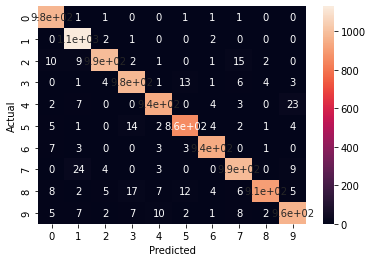

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
#confusion matrix for the best model that gives best accuracy in validation with visual graph
#knn k=3
data = {'y_Actual':   y_test,
        'y_Predicted': ytestpred_val_knn1
        }


df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()